# Estimation of tree height using GEDI dataset - Data explore

## Jupyterlab setup, libraries installing and data retrieving **[Just for UBUNTU 24.04]**

To run this lesson properly on osboxes.org you need to have a clean install of jupyterlab using the command line.
If you didn't do it for the previous lesson (Python data analysis or Python geospatial analysis), do it for this one, directly on the terminal:

    pipx uninstall jupyterlab
    pipx install --system-site-packages jupyterlab

and just after that, you can procede to install python libraries, using the apt install always in the terminal:

    sudo apt install python3-numpy python3-pandas python3-sklearn python3-matplotlib python3-rasterio python3-geopandas python3-seaborn python3-skimage python3-xarray

after that you can procede to data archive download

    cd  /media/sf_LVM_shared/my_SE_data/exercise/
    pipx install gdown
    ~/.local/bin/gdown 1Y60EuLsfmTICTX-U_FxcE1odNAf04bd-
    tar -xvzf tree_height.tar.gz

## Jupyterlab setup, libraries installing and data retrieving  **[Just for OSGEOLIVE16]**

## Getting the dataset

Being everything already installed, you can procede to to data archive download.

    
    cd ~/SE_data
    git pull
    rsync -hvrPt --ignore-existing ~/SE_data/* /media/sf_LVM_shared/my_SE_data
    cd  /media/sf_LVM_shared/my_SE_data/exercise
    pip install gdown
    ~/.local/bin/gdown 1Y60EuLsfmTICTX-U_FxcE1odNAf04bd-
    tar -xvzf tree_height.tar.gz

    # create a python avarage
    python3 -m venv $HOME/venv  --system-site-packages
    # enter in the enviroment. 
    source $HOME/venv/bin/activate

    # install python library
    pip3 install 'xarray>=2022.3.0' --upgrade --ignore-installed --force-reinstall
    pip3 install 'numpy>=1.23' --upgrade --ignore-installed --force-reinstall
    pip3 install  scikit-learn scikit-gstat geopandas rasterio seaborn

    # Start jupyter lab insede the python venv evenviroment
    jupyter lab Tree_Height_01DataExplore.ipynb

## GEDI features

The Global Ecosystem Dynamics Investigation (GEDI) mission aims to characterize ecosystem structure and dynamics to enable radically improved quantification of biomass. The GEDI instrument, attached to the International Space Station (ISS), collects data globally between 51.6° N and 51.6° S latitudes at the highest resolution and densest sampling of the 3-dimensional structure of the Earth.

GEDI's Level 2A Geolocated Elevation and Height Metrics Product (GEDI02_A) is primarily composed of Relative Height (RH) metrics of canopy height stored at different percentiles.

The GEDI02_A product is provided in HDF5 format and has a spatial resolution (average footprint) of 25 meters. The GEDI02_A data product contains 156 layers for each of the eight beams, including ground elevation, canopy top height, relative return energy metrics (e.g., canopy vertical structure), and many other interpreted products from the return waveforms. 


The [GEDI_Subsetter.py](https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-subsetter/browse) allows the conversion of the HDF5 format in to txt files. 
During the conversion several parameters can be extracted. The full list can be found at https://lpdaac.usgs.gov/documents/982/gedi_l2a_dictionary_P003_v2.html , and a general description is stored at https://lpdaac.usgs.gov/documents/986/GEDI02_UserGuide_V2.pdf

In [1]:
from IPython.display import Image
import rasterio
from rasterio import *
from rasterio.plot import show
from rasterio.plot import show_hist
import geopandas
import pandas as pd
from matplotlib import pyplot
#import skgstat as skg
import numpy as np
import seaborn as sns

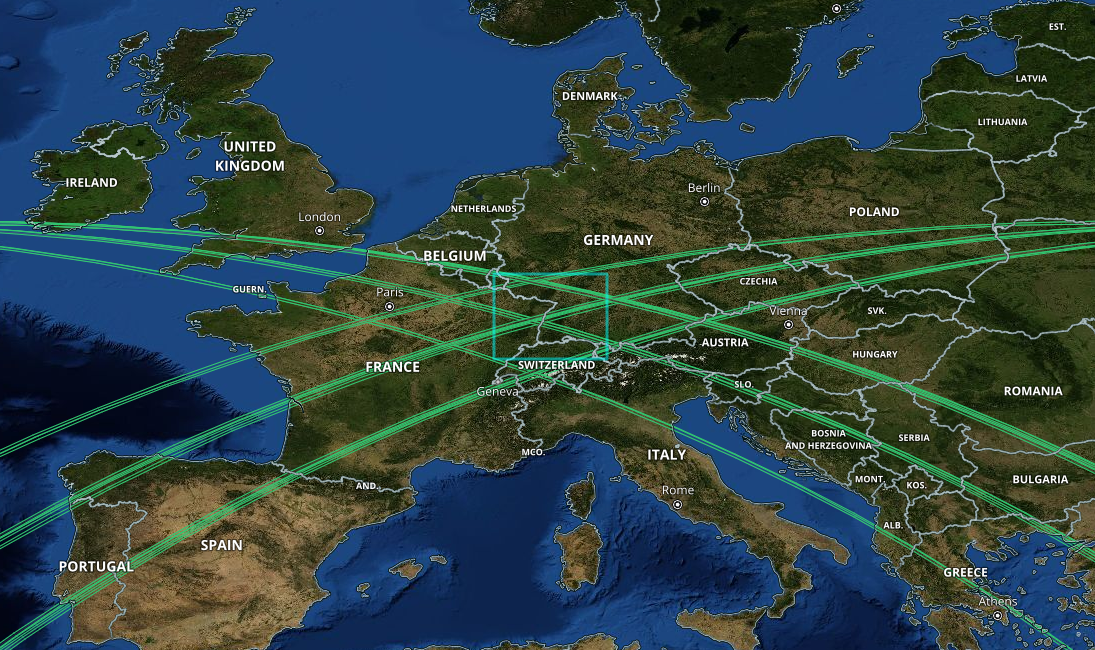

In [2]:
Image("../images/tree_height_path_map.png" , width = 500, height = 300)

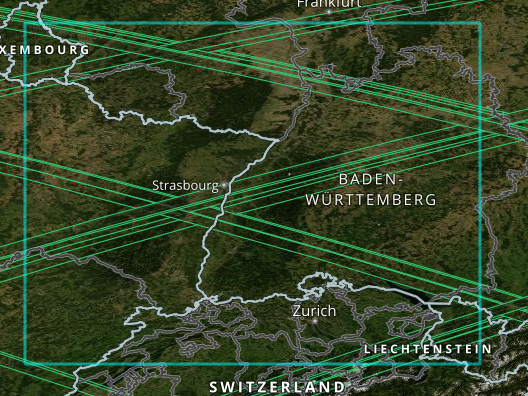

In [3]:
Image("../images/tree_height_study_area.png")

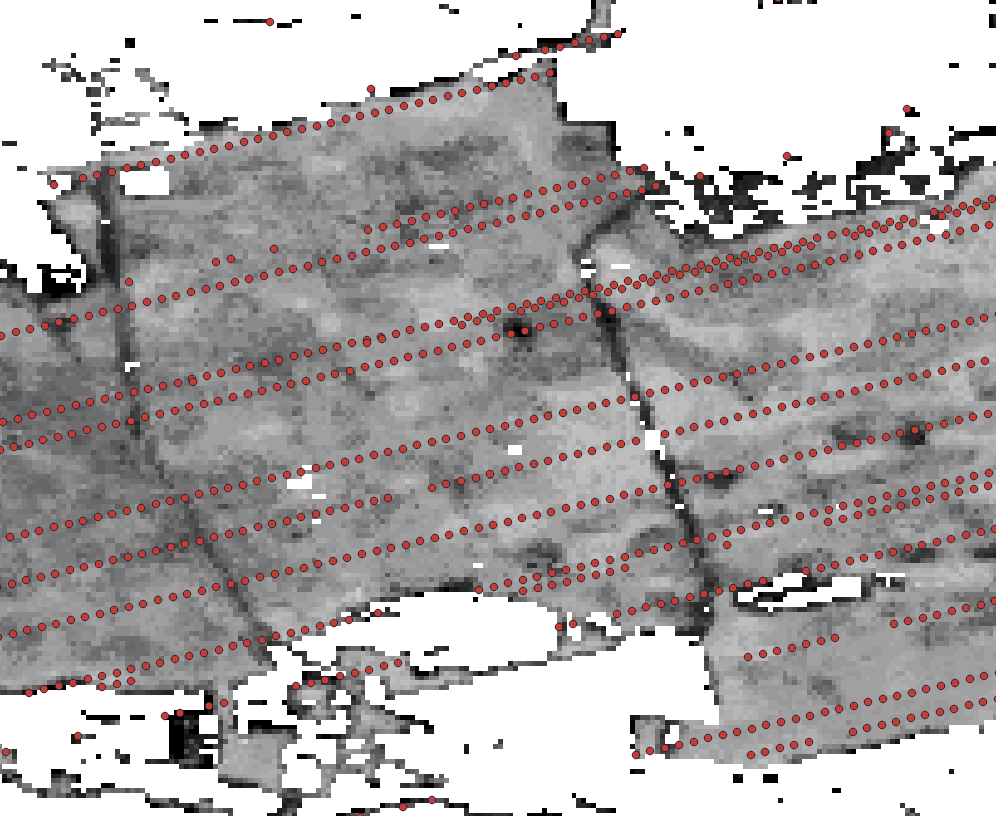

In [4]:
Image("../images/tree_height_study_area_selected.png" , width = 500, height = 300)

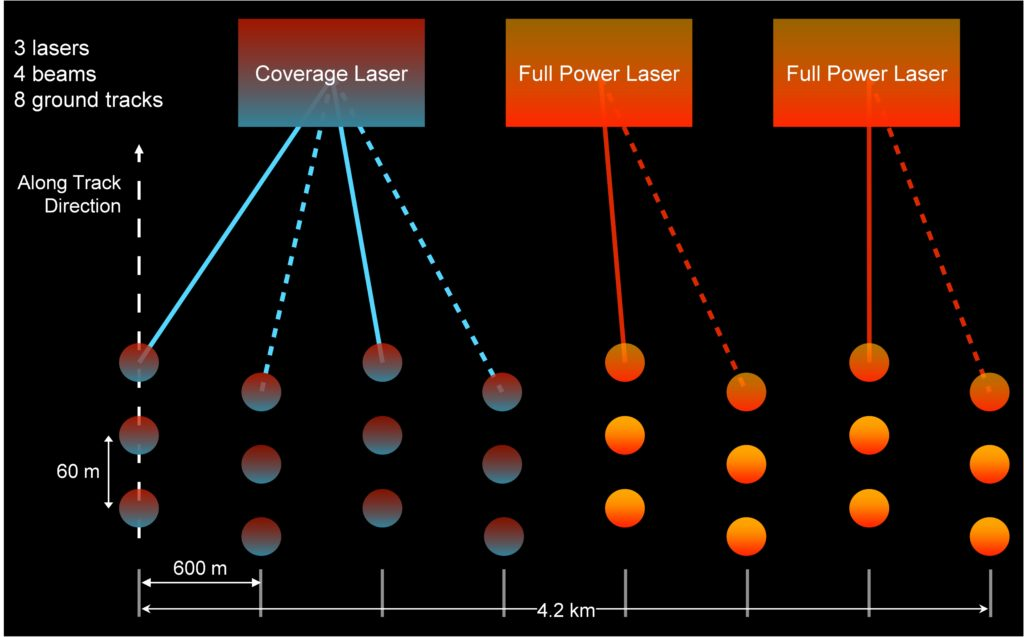

In [5]:
Image("../images/tree_height_beam.jpg" , width = 500, height = 300)

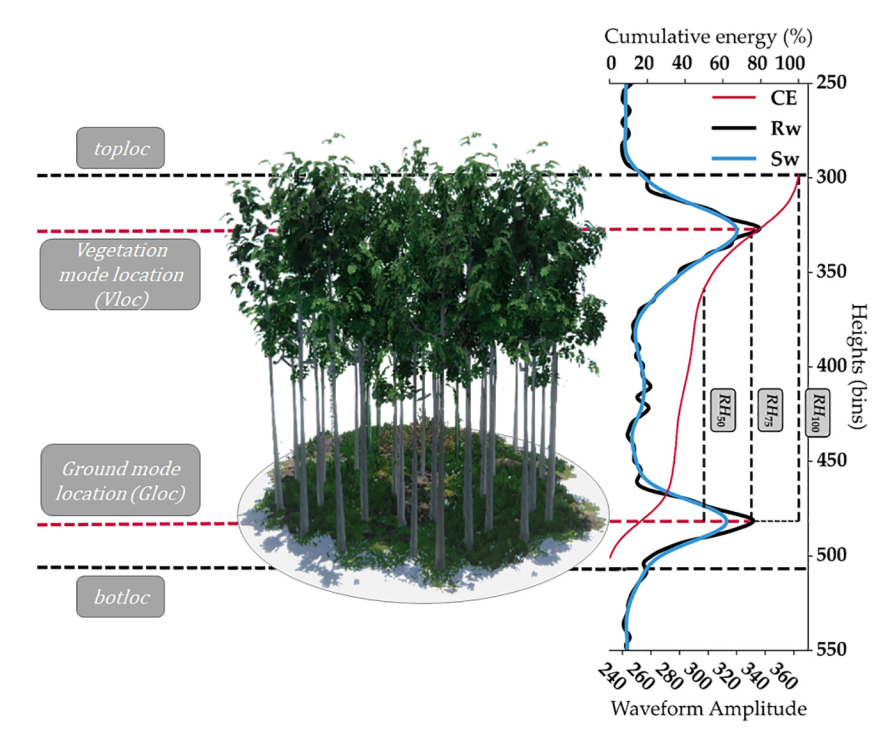

In [6]:
Image("../images/tree_height_pulse_distribution.png", width = 600, height = 300)

## Data presentation

### Available txt files

In [7]:
! ls tree_height/txt/*

tree_height/txt/eu_x_y_height_predictors_select.txt
tree_height/txt/eu_x_y_height_select.txt
tree_height/txt/eu_x_y_predictors_select.txt
tree_height/txt/eu_x_y_select.txt
tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt


In [8]:
! wc -l tree_height/txt/*

  1267240 tree_height/txt/eu_x_y_height_predictors_select.txt
  1267240 tree_height/txt/eu_x_y_height_select.txt
  1267240 tree_height/txt/eu_x_y_predictors_select.txt
  1267239 tree_height/txt/eu_x_y_select.txt
  1267240 tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt
  6336199 total


**File storing point location (longitude and latitude).**  
Such file can be used with "gdallocationinfo" to extract enviromental predictor at each point. 
The points have been already clean by removing all the points that falls in agricolture area, urban/built-up area, and water. In the immage below those areas are labeled in white.

In [9]:
! head tree_height/txt/eu_x_y_select.txt

6.050001 49.727499
6.0500017 49.922155
6.0500021 48.602377
6.0500089 48.151979
6.0500102 49.58841
6.0500143 48.608456
6.0500165 48.571401
6.0500189 49.921613
6.0500201 48.822645
6.0500238 49.847522


<AxesSubplot:>

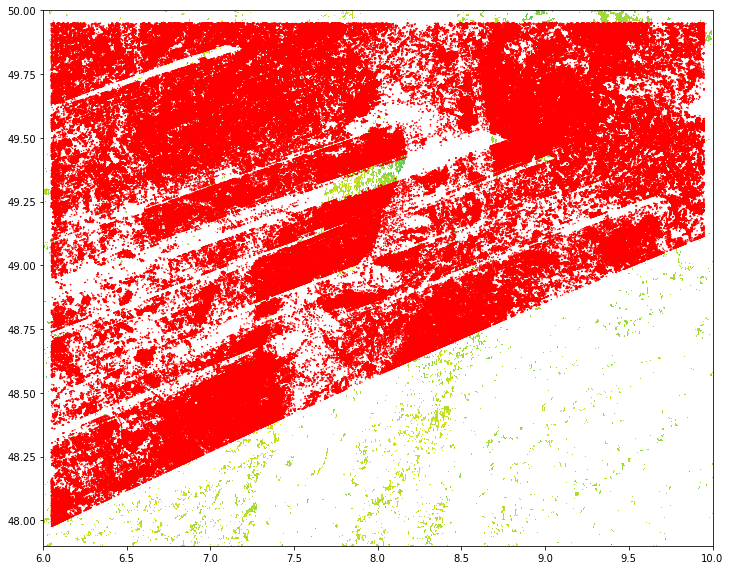

In [29]:
points = geopandas.read_file("tree_height/geodata_vector/eu_x_y_height_select.gpkg")
raster = rasterio.open("tree_height/geodata_raster/treecover.tif")
fig, ax = pyplot.subplots(figsize=(12, 12))
rasterio.plot.show(raster, ax=ax)
points.plot(ax=ax, facecolor='red', edgecolor='none', markersize=2)

**File storing tree hight (cm) obtained by 6 algorithms, with their associate quality flags.**
The quality flags can be used to refine and select the best tree height estimation and use it as tree height observation.

* a?_95: tree hight (cm) at 95 quintile, for each algorithm  
* min_rh_95: minimum value of tree hight (cm) ammong the 6 algorithms  
* max_rh_95: maximum value of tree hight (cm) ammong the 6 algorithms  
* BEAM: 1-4 coverage beam = lower power (worse) ; 5-8 power beam = higher power (better)  
* digital_elev: digital mdoel elevation  
* elev_low: elevation of center of lowest mode  
* qc_a?: quality_flag for six algorithms quality_flag = 1 (better); = 0 (worse)  
* se_a?: sensitivity for six algorithms sensitivity < 0.95 (worse);  sensitivity > 0.95  (better )  
* deg_fg: (degrade_flag) not-degraded 0 (better) ;  degraded > 0 (worse)  
* solar_ele: solar elevation. > 0 day (worse); < 0 night (better)  

In [30]:
height_6algorithms = pd.read_csv("tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt", sep=" ",  index_col=False)
pd.set_option('display.max_columns',None)
height_6algorithms.head(6)

ID         X          Y  a1_95  a2_95  a3_95  a4_95  a5_95  a6_95  \
0   1  6.050001  49.727499   3139   3139   3139   3120   3139   3139   
1   2  6.050002  49.922155   1022   2303    970    872   5596   1524   
2   3  6.050002  48.602377    380   1336    332    362   1336   1340   
3   4  6.050009  48.151979   3153   3142   3142   3127   3138   3142   
4   5  6.050010  49.588410    666   4221    651     33   5611   2723   
5   6  6.050014  48.608456    787   1179   1187    761   1833   1833   

   min_rh_95  max_rh_95  BEAM  digital_elev    elev_low  qc_a1  qc_a2  qc_a3  \
0       3120       3139     5         410.0   383.72153      1      1      1   
1        872       5596     5         290.0  2374.14110      0      0      0   
2        332       1340     4         440.0   435.97781      1      1      1   
3       3127       3153     2         450.0   422.00537      1      1      1   
4         33       5611     8         370.0  2413.74830      0      0      0   
5        761       1833     3         420.0   415.51581      1      1      1   

   qc_a4  qc_a5  qc_a6  se_a1  se_a2  se_a3  se_a4  se_a5  se_a6  deg_fg  \
0      1      1      1  0.962  0.984  0.968  0.962  0.989  0.979       0   
1      0      0      0  0.948  0.990  0.960  0.948  0.994  0.980       0   
2      1      1      1  0.947  0.975  0.956  0.947  0.981  0.968       0   
3      1      1      1  0.930  0.970  0.943  0.930  0.978  0.962       0   
4      0      0      0  0.941  0.983  0.946  0.941  0.992  0.969       0   
5      1      1      1  0.952  0.979  0.961  0.952  0.986  0.975       0   

   solar_ele  
0       17.7  
1       43.7  
2        0.2  
3      -14.2  
4       22.1  
5        0.2

In [31]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
height_6algorithms.describe()

ID          X          Y      a1_95      a2_95      a3_95  \
count 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00   
mean   633620.00       7.97      49.37    1807.40    2164.35    1885.92   
std    365820.53       1.10       0.47    1034.72    1107.12    1013.52   
min         1.00       6.05      47.98     115.00      82.00      37.00   
25%    316810.50       7.03      49.06     882.00    1474.00    1095.00   
50%    633620.00       7.84      49.51    1899.00    2240.00    1960.00   
75%    950429.50       8.98      49.73    2590.00    2817.00    2626.00   
max   1267239.00       9.95      49.95   14359.00   16070.00   14469.00   

           a4_95      a5_95      a6_95  min_rh_95  max_rh_95       BEAM  \
count 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00   
mean     1587.37    2692.24    2129.05    1582.89    2703.53       4.75   
std      1058.24    1310.33    1045.41    1056.13    1322.65       2.29   
min         3.00      78.00      82.00       3.00     116.00       1.00   
25%       488.00    1921.00    1457.00     486.00    1928.00       3.00   
50%      1650.00    2706.00    2230.00    1644.00    2711.00       5.00   
75%      2472.00    3414.00    2812.00    2468.00    3416.00       7.00   
max     13620.00   18000.00   18299.00   13620.00   18299.00       8.00   

       digital_elev   elev_low      qc_a1      qc_a2      qc_a3      qc_a4  \
count    1267239.00 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00   
mean         289.22     491.06       0.80       0.91       0.85       0.80   
std        10363.92     528.74       0.40       0.28       0.35       0.40   
min     -1000000.00     114.87       0.00       0.00       0.00       0.00   
25%          320.00     309.49       1.00       1.00       1.00       1.00   
50%          390.00     386.05       1.00       1.00       1.00       1.00   
75%          470.00     476.89       1.00       1.00       1.00       1.00   
max         1200.00    8566.18       1.00       1.00       1.00       1.00   

           qc_a5      qc_a6      se_a1      se_a2      se_a3      se_a4  \
count 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00   
mean        0.92       0.90       0.93       0.97       0.95       0.93   
std         0.26       0.30       0.44       0.19       0.36       0.44   
min         0.00       0.00    -411.76    -178.46    -339.98    -411.76   
25%         1.00       1.00       0.92       0.97       0.94       0.92   
50%         1.00       1.00       0.95       0.98       0.96       0.95   
75%         1.00       1.00       0.97       0.99       0.97       0.97   
max         1.00       1.00     181.09      84.12     153.38     181.09   

           se_a5      se_a6     deg_fg  solar_ele  
count 1267239.00 1267239.00 1267239.00 1267239.00  
mean        0.98       0.96      12.46      -1.33  
std         0.14       0.25      25.89      30.75  
min      -124.62    -232.30       0.00     -63.60  
25%         0.98       0.96       0.00     -23.40  
50%         0.99       0.97       0.00      -4.90  
75%         0.99       0.98       0.00      23.30  
max        63.34     111.83      80.00      64.00

Count observation during the day (>0) and during the night (<0)

In [32]:
(height_6algorithms["solar_ele"] < 0).sum()   # night (better)

700460

In [33]:
(height_6algorithms["solar_ele"] > 0).sum()   # day (worse)

566779

Count uniq degraged (>0) or not-degraded (0) observation

In [34]:
height_6algorithms["deg_fg"].value_counts()

0     967716
70    139223
30     48378
5      44063
80     42052
50     16666
9       5815
71      1406
1       1368
35       481
39        71
Name: deg_fg, dtype: int64

In [35]:
height_6algorithms["solar_ele"].value_counts()

-35.10    17572
-35.20    11174
-20.60    10390
-16.80     9658
25.60      7223
          ...  
10.00         2
-0.40         1
-60.40        1
42.10         1
-32.40        1
Name: solar_ele, Length: 1101, dtype: int64

**File storing point location and tree height. The height is obtained as average of the 4 algorithms.**
Among the 6 algorithms we calculate minimum and maximum of heith values, then we calculate the mean excluding the minimum and the maximum. 

In [36]:
! head tree_height/txt/eu_x_y_height_select.txt  
! paste -d " "  tree_height/txt/eu_x_y_height_select.txt > 

ID X Y h
1 6.050001 49.727499 3139
2 6.0500017 49.922155 1454.75
3 6.0500021 48.602377 853.5
4 6.0500089 48.151979 3141
5 6.0500102 49.58841 2065.25
6 6.0500143 48.608456 1246.5
7 6.0500165 48.571401 2938.75
8 6.0500189 49.921613 3294.75
9 6.0500201 48.822645 1623.5
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: ` paste -d " "  tree_height/txt/eu_x_y_height_select.txt >'


### Available geo raster files

In [37]:
! ls tree_height/geodata_raster

BLDFIE_WeigAver.tif    glad_ard_SVVI_med.tif
CECSOL_WeigAver.tif    glad_ard_SVVI_min.tif
CHELSA_bio18.tif       latitude.tif
CHELSA_bio4.tif        longitude.tif
convergence.tif        northness.tif
cti.tif		       ORCDRC_WeigAver.tif
dev-magnitude.tif      outlet_dist_dw_basin.tif
eastness.tif	       SBIO3_Isothermality_5_15cm.tif
elev.tif	       SBIO4_Temperature_Seasonality_5_15cm.tif
forestheight.tif       treecover.tif
glad_ard_SVVI_max.tif


The geo raster have been standarized in terms of extent and pixel resolution, using *gdal_translate* and *gdal_edit.py*

In [38]:
! gdalinfo tree_height/geodata_raster/glad_ard_SVVI_min.tif

Driver: GTiff/GeoTIFF
Files: tree_height/geodata_raster/glad_ard_SVVI_min.tif
Size is 16000, 8400
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degr

The urban building, agricolture land and water has been maskout using *pksetmask* and set as No-datga. In the following maps it is rappresented in white color. Point location has been moved accordingly. 

### Geo raster files description.

**Spectral Variability Vegetation Index obtained from the [GLAD ARD](https://glad.umd.edu/ard/glad-landsat-ard-tools) dataset.** 

* glad_ard_SVVI_min.tif: Spectral Variability Vegetation Index colculated using a 3 years temporal minimum composite. 
* glad_ard_SVVI_med.tif: Spectral Variability Vegetation Index colculated using a 3 years temporal median composite.
* glad_ard_SVVI_max.tif: Spectral Variability Vegetation Index colculated using a 3 years temporal maximum composite.

<AxesSubplot:title={'center':'glad_ard_SVVI_max.tif'}>

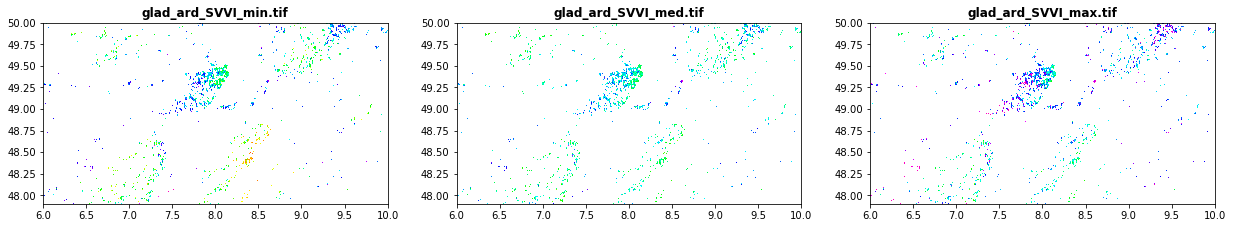

In [10]:
src1 = rasterio.open("tree_height/geodata_raster/glad_ard_SVVI_min.tif")
src2 = rasterio.open("tree_height/geodata_raster/glad_ard_SVVI_med.tif")
src3 = rasterio.open("tree_height/geodata_raster/glad_ard_SVVI_max.tif")
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show(src1, ax=src1p, title='glad_ard_SVVI_min.tif' , vmin=-500, vmax=+500, cmap='gist_rainbow' )
show(src2, ax=src2p, title='glad_ard_SVVI_med.tif' , vmin=-500, vmax=+500, cmap='gist_rainbow' )
show(src3, ax=src3p, title='glad_ard_SVVI_max.tif' , vmin=-500, vmax=+500, cmap='gist_rainbow' )

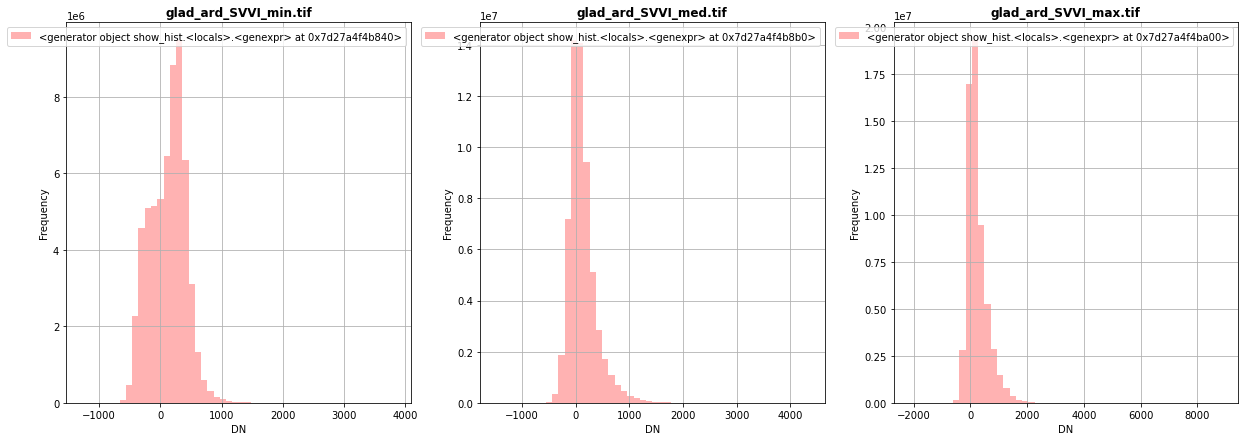

In [11]:
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="glad_ard_SVVI_min.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="glad_ard_SVVI_med.tif")
show_hist( src3, ax=src3p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="glad_ard_SVVI_max.tif")

**Climate data obained from the [CHELSA](https://chelsa-climate.org/bioclim/) dataset.** 

* CHELSA_bio18.tif: mean monthly precipitation amount of the warmest quarter
* CHELSA_bio4.tif: temperature seasonality (standard deviation of the monthly mean temperatures)

<AxesSubplot:title={'center':'CHELSA_bio18'}>

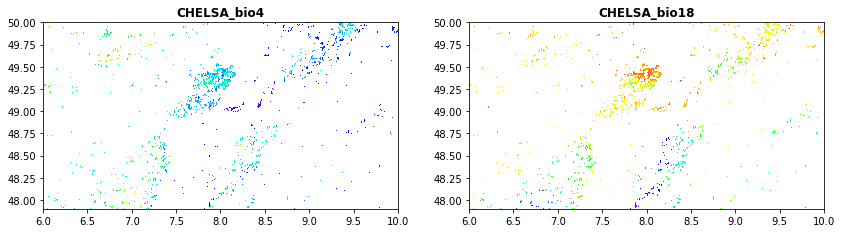

In [24]:
import rasterio
from rasterio.plot import show
src1 = rasterio.open("tree_height/geodata_raster/CHELSA_bio4.tif")
src2 = rasterio.open("tree_height/geodata_raster/CHELSA_bio18.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='CHELSA_bio4'  , cmap='gist_rainbow')
show((src2), ax=src2p, title='CHELSA_bio18' , cmap='gist_rainbow')

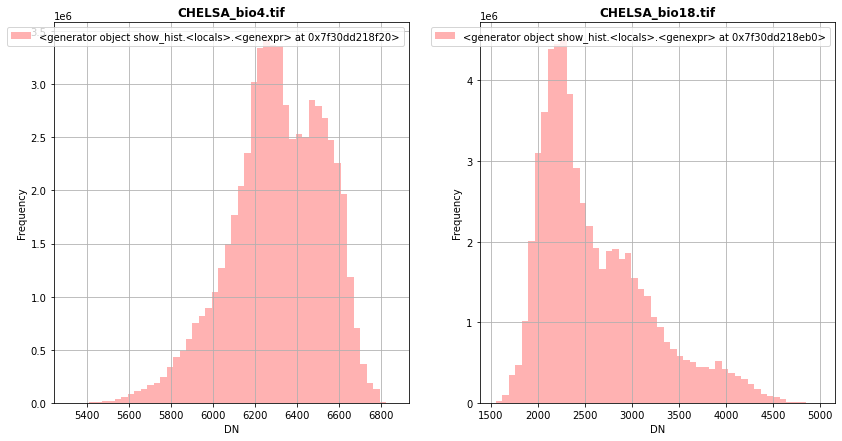

In [25]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="CHELSA_bio4.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="CHELSA_bio18.tif")

**Soil data obained from the [SOILGRID](https://soilgrids.org/)**

* BLDFIE_WeigAver.tif: Bulk density (fine earth) in kg / cubic-meter (weigheted average as function for the depth)
* CECSOL_WeigAver.tif: Cation exchange capacity of soil in cmolc/kg (weigheted average as function for the depth)
* ORCDRC_WeigAver.tif: Soil organic carbon content (fine earth fraction) in g per kg (weigheted average as function for the depth)

<AxesSubplot:title={'center':'ORCDRC_WeigAver.tif'}>

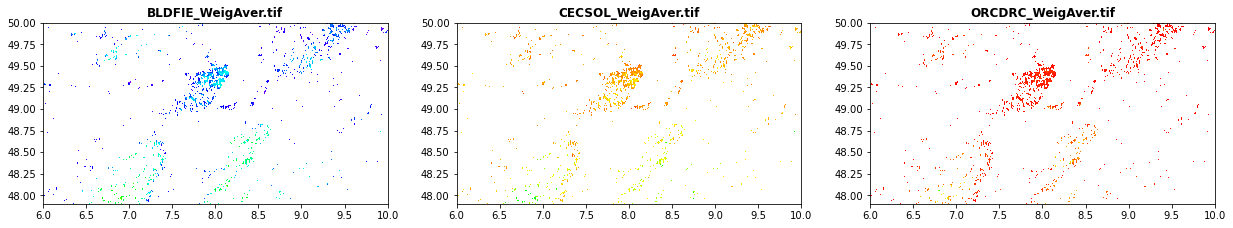

In [26]:
src1 = rasterio.open("tree_height/geodata_raster/BLDFIE_WeigAver.tif")
src2 = rasterio.open("tree_height/geodata_raster/CECSOL_WeigAver.tif")
src3 = rasterio.open("tree_height/geodata_raster/ORCDRC_WeigAver.tif")
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show(src1, ax=src1p, title='BLDFIE_WeigAver.tif' , cmap='gist_rainbow')
show(src2, ax=src2p, title='CECSOL_WeigAver.tif' , cmap='gist_rainbow')
show(src3, ax=src3p, title='ORCDRC_WeigAver.tif' , cmap='gist_rainbow')

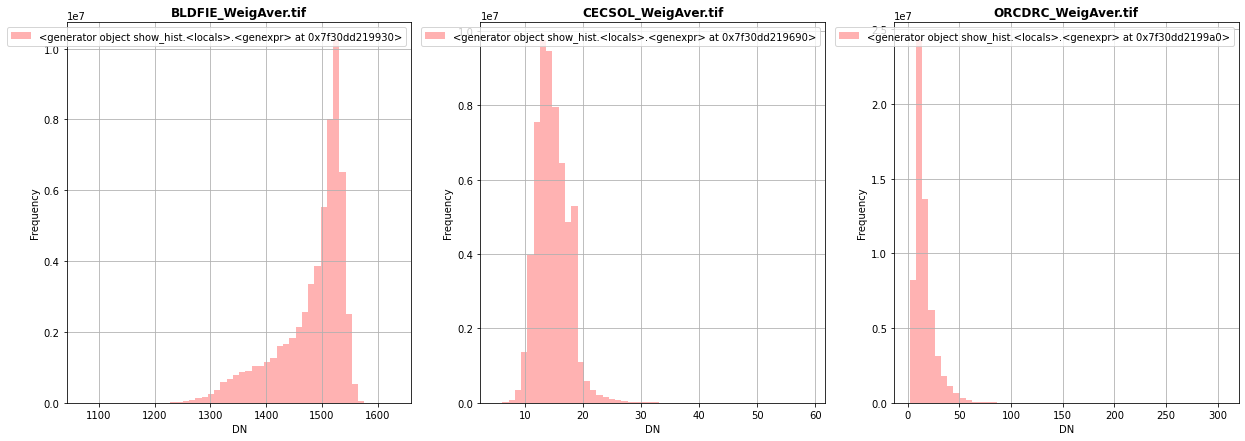

In [27]:
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="BLDFIE_WeigAver.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="CECSOL_WeigAver.tif")
show_hist( src3, ax=src3p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="ORCDRC_WeigAver.tif")

**Geomorphological data obtained from [geomorpho90m](http://spatial-ecology.net/docs/build/html/GEODATA/geomorpho90m/geomorpho90m.html)**

* elev.tif: elevation
* convergence.tif: convergence 
* northness.tif: northness
* eastness.tif: eastness
* dev-magnitude.tif: Maximum multiscaledeviation

<AxesSubplot:title={'center':'dev-magnitude.tif'}>

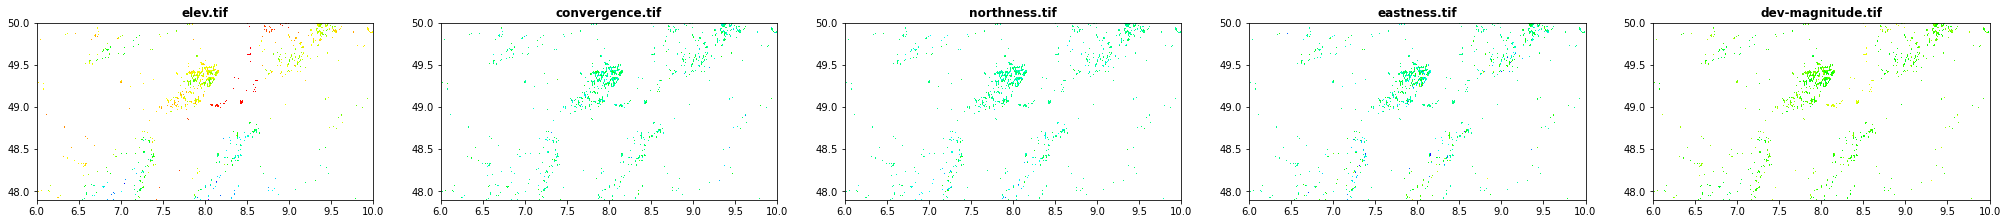

In [28]:
src1 = rasterio.open("tree_height/geodata_raster/elev.tif")
src2 = rasterio.open("tree_height/geodata_raster/convergence.tif")
src3 = rasterio.open("tree_height/geodata_raster/northness.tif")
src4 = rasterio.open("tree_height/geodata_raster/eastness.tif")
src5 = rasterio.open("tree_height/geodata_raster/dev-magnitude.tif")
fig, (src1p,src2p,src3p,src4p,src5p) = pyplot.subplots(1,5, figsize=(35,7))
show(src1, ax=src1p, title='elev.tif' ,  cmap='gist_rainbow')
show(src2, ax=src2p, title='convergence.tif' , cmap='gist_rainbow')
show(src3, ax=src3p, title='northness.tif' , cmap='gist_rainbow')
show(src4, ax=src4p, title='eastness.tif', cmap='gist_rainbow')
show(src5, ax=src5p, title='dev-magnitude.tif' , cmap='gist_rainbow')

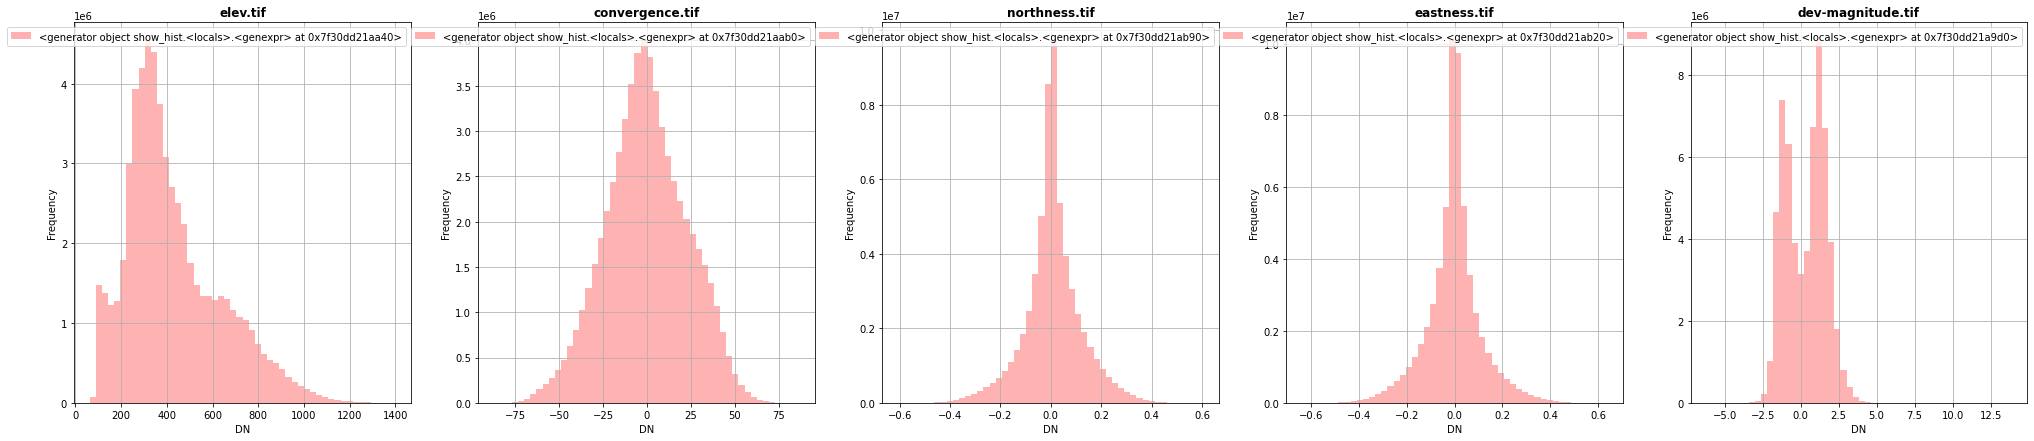

In [29]:
fig, (src1p,src2p,src3p,src4p,src5p) = pyplot.subplots(1,5, figsize=(35,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="elev.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="convergence.tif")
show_hist( src3, ax=src3p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="northness.tif")
show_hist( src4, ax=src4p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="eastness.tif")
show_hist( src5, ax=src5p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="dev-magnitude.tif")

**Hydrography data obtained from [hydromorpho90m](https://essd.copernicus.org/preprints/essd-2022-9/)**

* cti.tif:Compound topographic index
* outlet_dist_dw_basin.tif: Distance between focal grid cell and the outlet grid cell in the network 

<AxesSubplot:title={'center':'outlet_dist_dw_basin.tif'}>

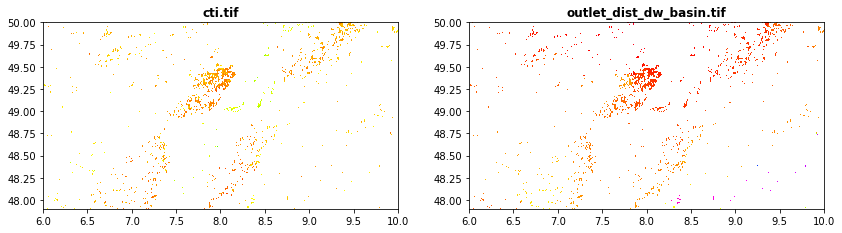

In [30]:
src1 = rasterio.open("tree_height/geodata_raster/cti.tif")
src2 = rasterio.open("tree_height/geodata_raster/outlet_dist_dw_basin.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='cti.tif' , cmap='gist_rainbow')
show((src2), ax=src2p, title='outlet_dist_dw_basin.tif' , cmap='gist_rainbow')

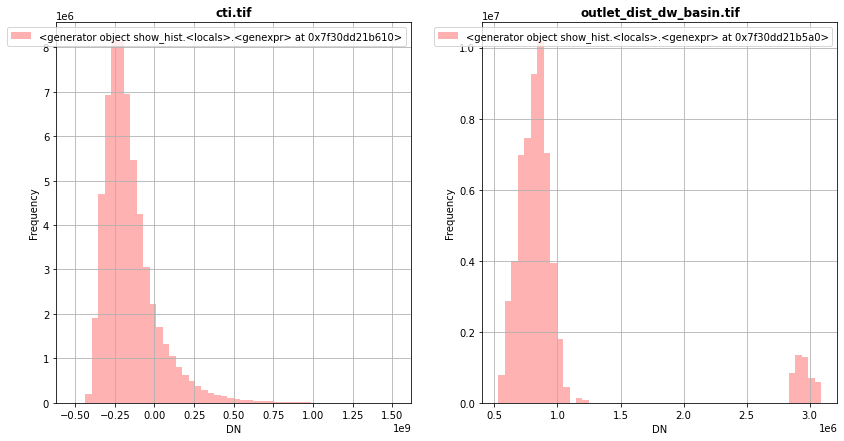

In [31]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="cti.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="outlet_dist_dw_basin.tif")

**Soil data obtained from [Global Soil Bioclimatic variables](https://zenodo.org/record/4558732#.YmqPg3VfiV4)**

* SBIO3_Isothermality_5_15cm.tif
* SBIO4_Temperature_Seasonality_5_15cm.tif

<AxesSubplot:title={'center':'SBIO4_Temperature_Seasonality_5_15cm.tif'}>

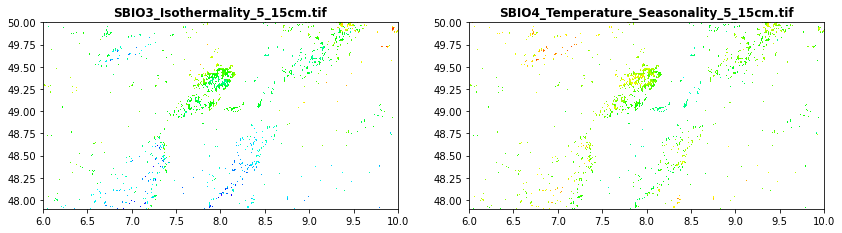

In [32]:
src1 = rasterio.open("tree_height/geodata_raster/SBIO3_Isothermality_5_15cm.tif")
src2 = rasterio.open("tree_height/geodata_raster/SBIO4_Temperature_Seasonality_5_15cm.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='SBIO3_Isothermality_5_15cm.tif', cmap='gist_rainbow')
show((src2), ax=src2p, title='SBIO4_Temperature_Seasonality_5_15cm.tif', cmap='gist_rainbow')

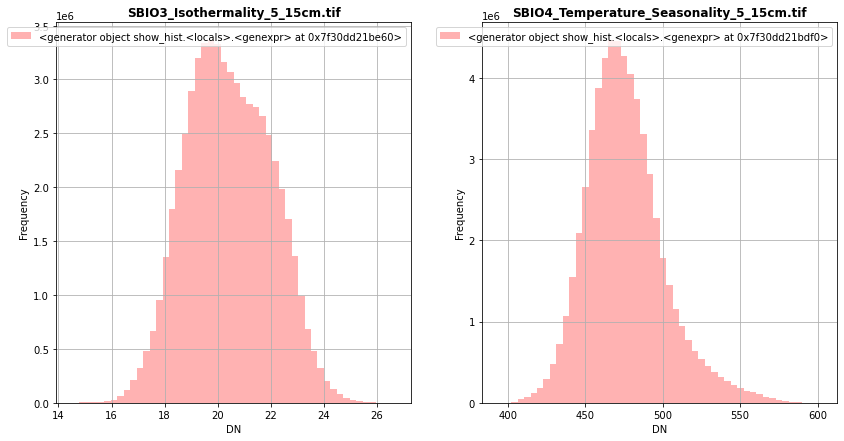

In [33]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="SBIO3_Isothermality_5_15cm.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="SBIO4_Temperature_Seasonality_5_15cm.tif")

**Forest cover in percentage obtained from [Global Forest Change](https://earthenginepartners.appspot.com/science-2013-global-forest/download_v1.7.html)**

* treecover.tif: canopy cover in percentage

<AxesSubplot:title={'center':'treecover.tif'}>

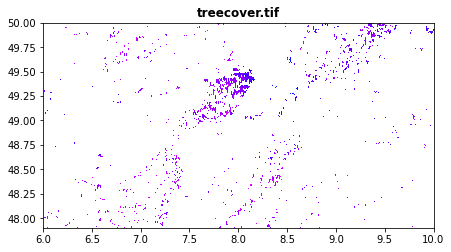

In [34]:
src1 = rasterio.open("tree_height/geodata_raster/treecover.tif")
fig, src1p = pyplot.subplots(1,1, figsize=(7,7))
show(src1, ax=src1p, title='treecover.tif', vmin=0 , vmax=100 , cmap='gist_rainbow')

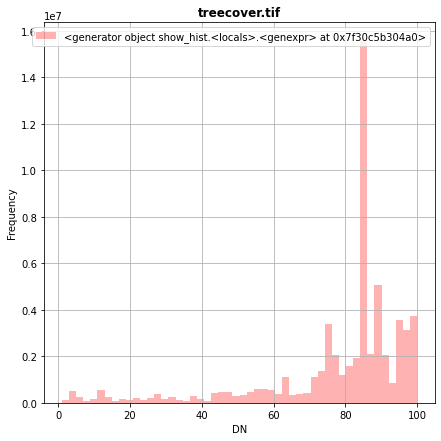

In [35]:
fig, (src1p) = pyplot.subplots(1,1, figsize=(7,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="treecover.tif")

**Forest height in percentage obtained from [Forest Height](https://glad.umd.edu/dataset/gedi)**


The [Global Forest Canopy Height, 2019](https://glad.umd.edu/dataset/gedi) map has been release in 2020 (scientific publication https://doi.org/10.1016/j.rse.2020.112165). The authors use a regression tree model that was calibrated and applied to each individual Landsat GLAD ARD tile (1 × 1◦) in a “moving window” mode. Such tree height estimation is storede in forestheight.tiff and in the table as *forestheight* column.
We will try to beats such estimation using a more advance ML tecnques and different enviromental predictors that better express the ecolocacal condition.


* forestheight.tif

<AxesSubplot:title={'center':'forestheight.tiff'}>

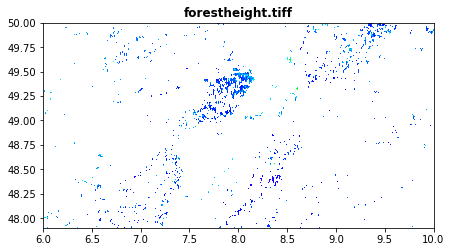

In [36]:
src1 = rasterio.open("tree_height/geodata_raster/forestheight.tif")
fig, src1p = pyplot.subplots(1,1, figsize=(7,7))
show(src1, ax=src1p, title='forestheight.tiff' , cmap='gist_rainbow')

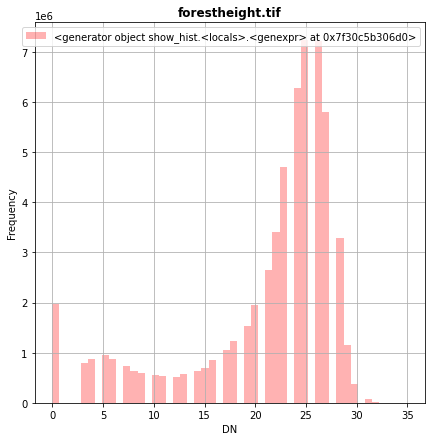

In [37]:
fig, src1p = pyplot.subplots(1,1, figsize=(7,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="forestheight.tif"  )

**Latitude and longittude obtained from GRASS (r.latlong)[https://grass.osgeo.org/grass78/manuals/r.latlong.html]**

* longitude.tif
* latitude.tif   

<AxesSubplot:title={'center':'latitude.tif'}>

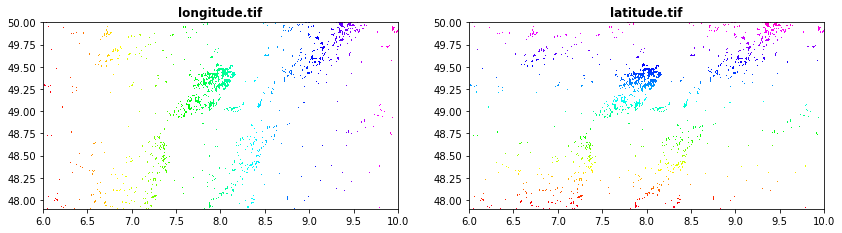

In [5]:
src1 = rasterio.open("tree_height/geodata_raster/longitude.tif")
src2 = rasterio.open("tree_height/geodata_raster/latitude.tif")
fig, (src1p, src2p) = pyplot.subplots(1,2, figsize=(14,7))
show(src1, ax=src1p, title='longitude.tif' , cmap='gist_rainbow')
show(src2, ax=src2p, title='latitude.tif' , cmap='gist_rainbow')

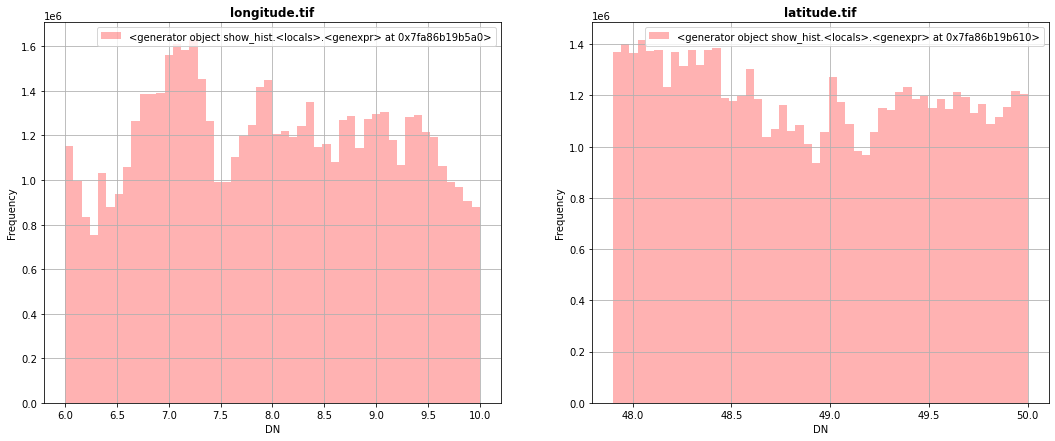

In [6]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(18,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="longitude.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="latitude.tif")

**File storing enviromental predictors at each point location.**

In [7]:
predictors = pd.read_csv("tree_height/txt/eu_x_y_height_predictors_select.txt", sep=" ",  index_col=False)
pd.set_option('display.max_columns',None)
predictors.head(6)

ID         X          Y        h  BLDFIE_WeigAver  CECSOL_WeigAver  \
0   1  6.050001  49.727499  3139.00             1540               13   
1   2  6.050002  49.922155  1454.75             1491               12   
2   3  6.050002  48.602377   853.50             1521               17   
3   4  6.050009  48.151979  3141.00             1526               16   
4   5  6.050010  49.588410  2065.25             1547               14   
5   6  6.050014  48.608456  1246.50             1515               19   

   CHELSA_bio18  CHELSA_bio4  convergence        cti  dev-magnitude  eastness  \
0          2113         5893   -10.486560 -238043120       1.158417  0.069094   
1          1993         5912    33.274361 -208915344      -1.755341  0.269112   
2          2124         5983     0.045293 -137479792       1.908780 -0.016055   
3          2569         6130   -33.654274 -267223072       0.965787  0.067767   
4          2108         5923    27.493824 -107809368      -0.162624  0.014065   
5          2124         6010    -1.602039   17384282       1.447979 -0.018912   

         elev  forestheight  glad_ard_SVVI_max  glad_ard_SVVI_med  \
0  353.983124            23         276.871094          46.444092   
1  267.511688            19         -49.526367          19.552734   
2  389.751160            21          93.257324          50.743652   
3  380.207703            27         542.401367         202.264160   
4  308.042786            25         136.048340         146.835205   
5  364.527100            18         221.339844         247.387207   

   glad_ard_SVVI_min  northness  ORCDRC_WeigAver  outlet_dist_dw_basin  \
0         347.665405   0.042500                9                780403   
1        -130.541748   0.182780               16                772777   
2         384.522461   0.036253               14                898820   
3         386.156738   0.005139               15                831824   
4         198.127441   0.028847               17                796962   
5         480.387939   0.042747               14                897945   

   SBIO3_Isothermality_5_15cm  SBIO4_Temperature_Seasonality_5_15cm  treecover  
0                   19.798992                            440.672211         85  
1                   20.889412                            457.756195         85  
2                   20.695877                            481.879700         62  
3                   19.375000                            479.410278         85  
4                   18.777500                            457.880066         85  
5                   19.398880                            474.331329         62

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
predictors.describe()

ID             X             Y             h  \
count 1267239.00000 1267239.00000 1267239.00000 1267239.00000   
mean   633620.00000       7.96654      49.36511    1994.97683   
std    365820.53323       1.10181       0.46899     977.86026   
min         1.00000       6.05000      47.97635      84.75000   
25%    316810.50000       7.02639      49.05567    1326.75000   
50%    633620.00000       7.84351      49.51040    2078.00000   
75%    950429.50000       8.97501      49.73179    2676.00000   
max   1267239.00000       9.95000      49.95000   14481.00000   

       BLDFIE_WeigAver  CECSOL_WeigAver  CHELSA_bio18   CHELSA_bio4  \
count    1267239.00000    1267239.00000 1267239.00000 1267239.00000   
mean        1502.39574         13.68642    2310.15649    6293.88506   
std           44.27063          2.21764     366.82038     224.88881   
min         1216.00000          6.00000    1553.00000    5503.00000   
25%         1491.00000         12.00000    2078.00000    6149.00000   
50%         1518.00000         13.00000    2242.00000    6304.00000   
75%         1531.00000         15.00000    2457.00000    6477.00000   
max         1599.00000         38.00000    4618.00000    6814.00000   

        convergence              cti  dev-magnitude      eastness  \
count 1267239.00000    1267239.00000  1267239.00000 1267239.00000   
mean       -0.14166 -149126079.37575        0.25312      -0.00370   
std        23.15530  166804129.24955        1.31914       0.10254   
min       -81.28032 -474056768.00000       -5.47250      -0.63450   
25%       -15.25398 -259747944.00000       -0.99220      -0.05173   
50%        -0.66545 -188826192.00000        0.46544      -0.00116   
75%        15.50443  -84776040.00000        1.31942       0.04273   
max        79.13613 1393578752.00000       11.05419       0.56048   

               elev  forestheight  glad_ard_SVVI_max  glad_ard_SVVI_med  \
count 1267239.00000 1267239.00000      1267239.00000      1267239.00000   
mean      338.88664      20.75837          250.98824          119.72647   
std       130.18989       7.31751          349.75421          257.31665   
min        82.19376       0.00000         -865.58301         -699.90332   
25%       259.10744      19.00000           16.96252          -43.99414   
50%       331.79755      24.00000          162.78882           70.64990   
75%       408.29001      26.00000          405.89746          220.47534   
max      1097.69751      34.00000         4506.54102         4149.77930   

       glad_ard_SVVI_min     northness  ORCDRC_WeigAver  outlet_dist_dw_basin  \
count      1267239.00000 1267239.00000    1267239.00000         1267239.00000   
mean           148.13463       0.00737         13.97081          749213.04208   
std            267.01116       0.10150          7.08598          100361.51781   
min           -842.19458      -0.52740          3.00000          540427.00000   
25%            -37.99170      -0.04133          9.00000          674957.00000   
50%            182.67358       0.00359         12.00000          742105.00000   
75%            324.65247       0.05970         16.00000          811864.00000   
max           3570.01855       0.55303        139.00000         1028934.00000   

       SBIO3_Isothermality_5_15cm  SBIO4_Temperature_Seasonality_5_15cm  \
count               1267239.00000                         1267239.00000   
mean                     19.79155                             476.60503   
std                       1.31156                              27.05428   
min                      14.61014                             394.21213   
25%                      18.90800                             458.58015   
50%                      19.76031                             473.55383   
75%                      20.62271                             491.08063   
max                      26.08103                             598.17474   

          treecover  
count 1267239.00000  
mean       77.64616  
std        21.02552  

### Assessing variable autocorrelation

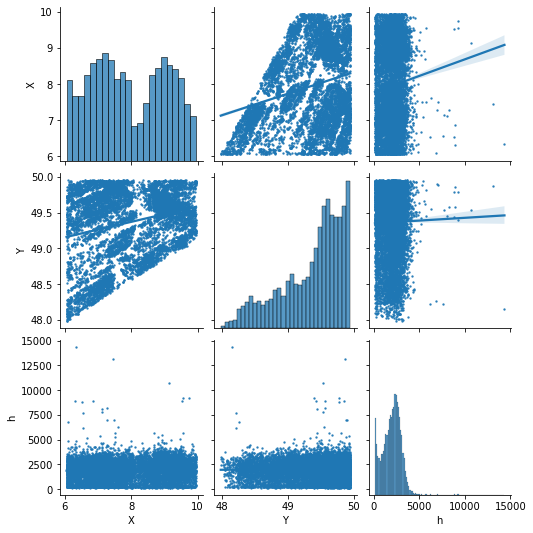

In [9]:
predictors_sample = predictors[["X","Y","h"]].sample(10000)
sns.pairplot(predictors_sample ,  kind="reg", plot_kws=dict(scatter_kws=dict(s=2)))  
pyplot.show()

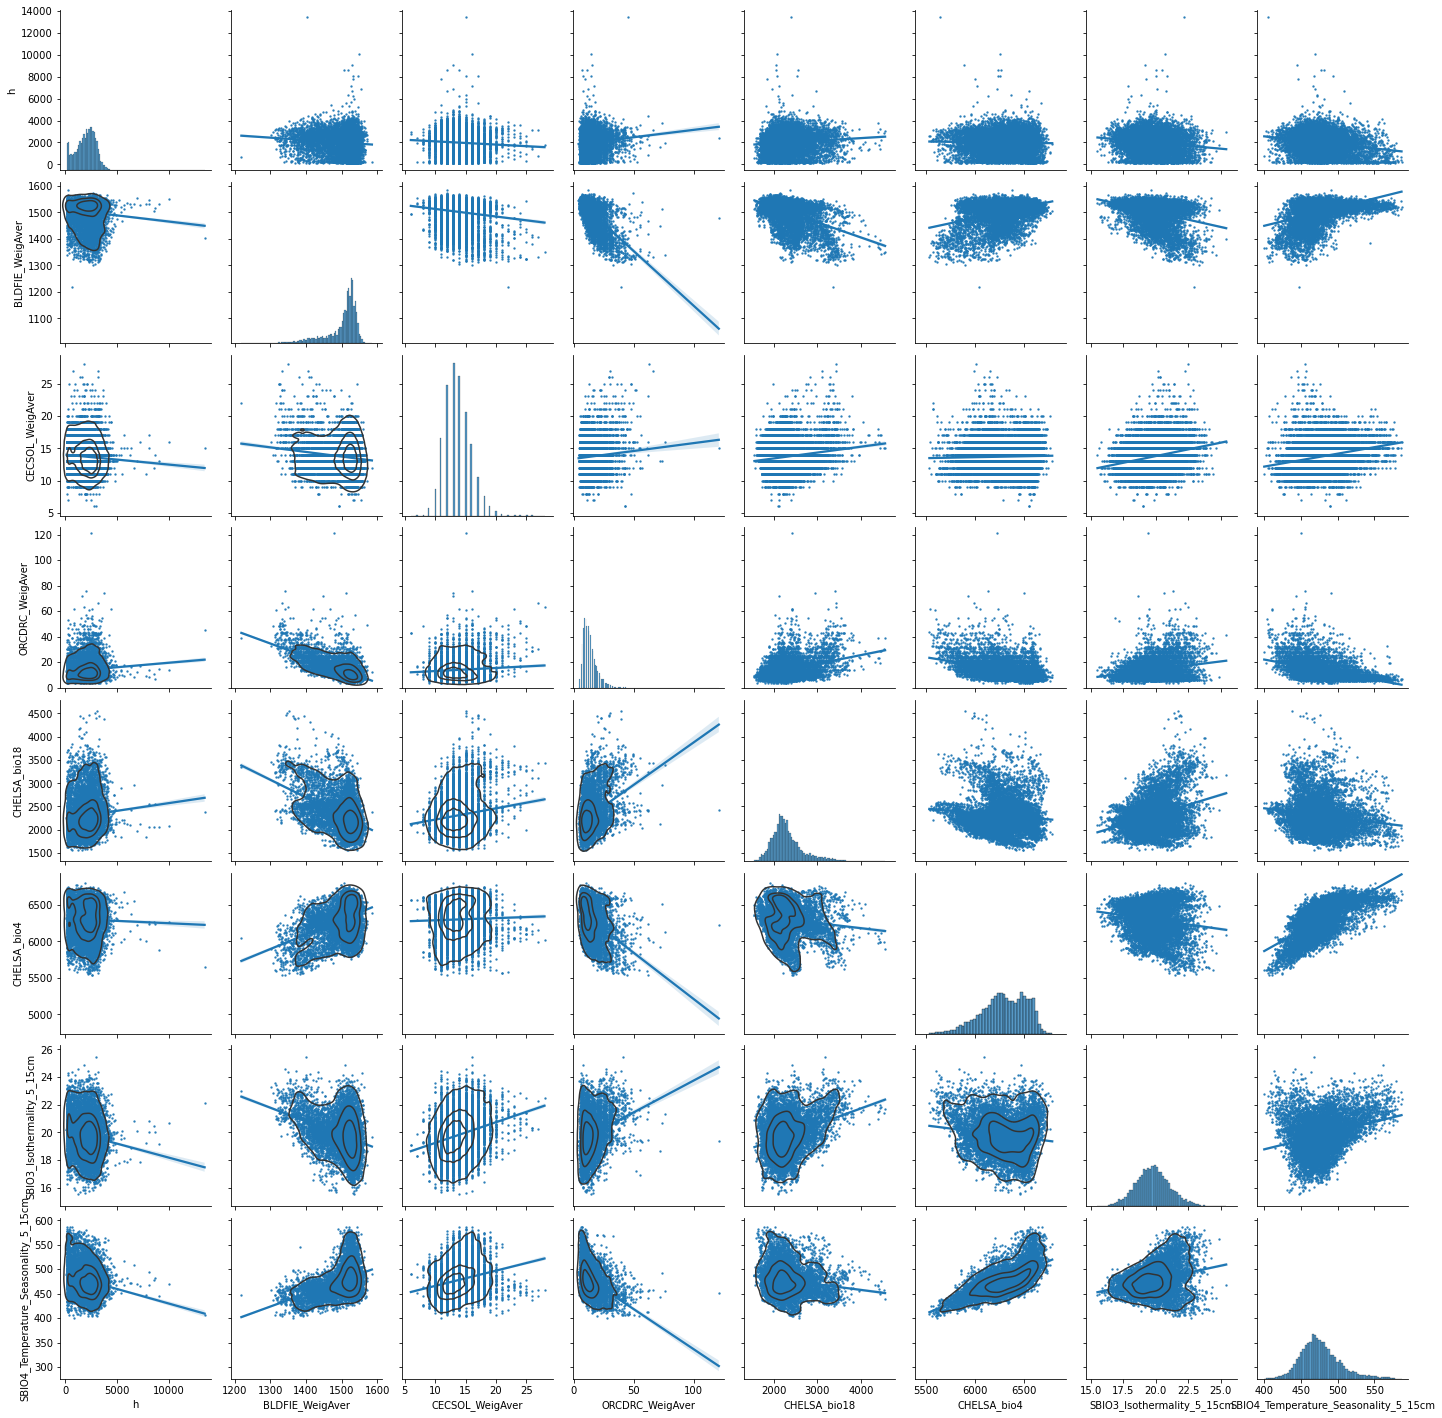

In [10]:
predictors_sample = predictors[["h","BLDFIE_WeigAver","CECSOL_WeigAver","ORCDRC_WeigAver","CHELSA_bio18","CHELSA_bio4","SBIO3_Isothermality_5_15cm","SBIO4_Temperature_Seasonality_5_15cm"]].sample(10000)
g = sns.pairplot(predictors_sample , kind="reg", plot_kws=dict(scatter_kws=dict(s=2)) )  
g.map_lower(sns.kdeplot, levels=4, color=".2")

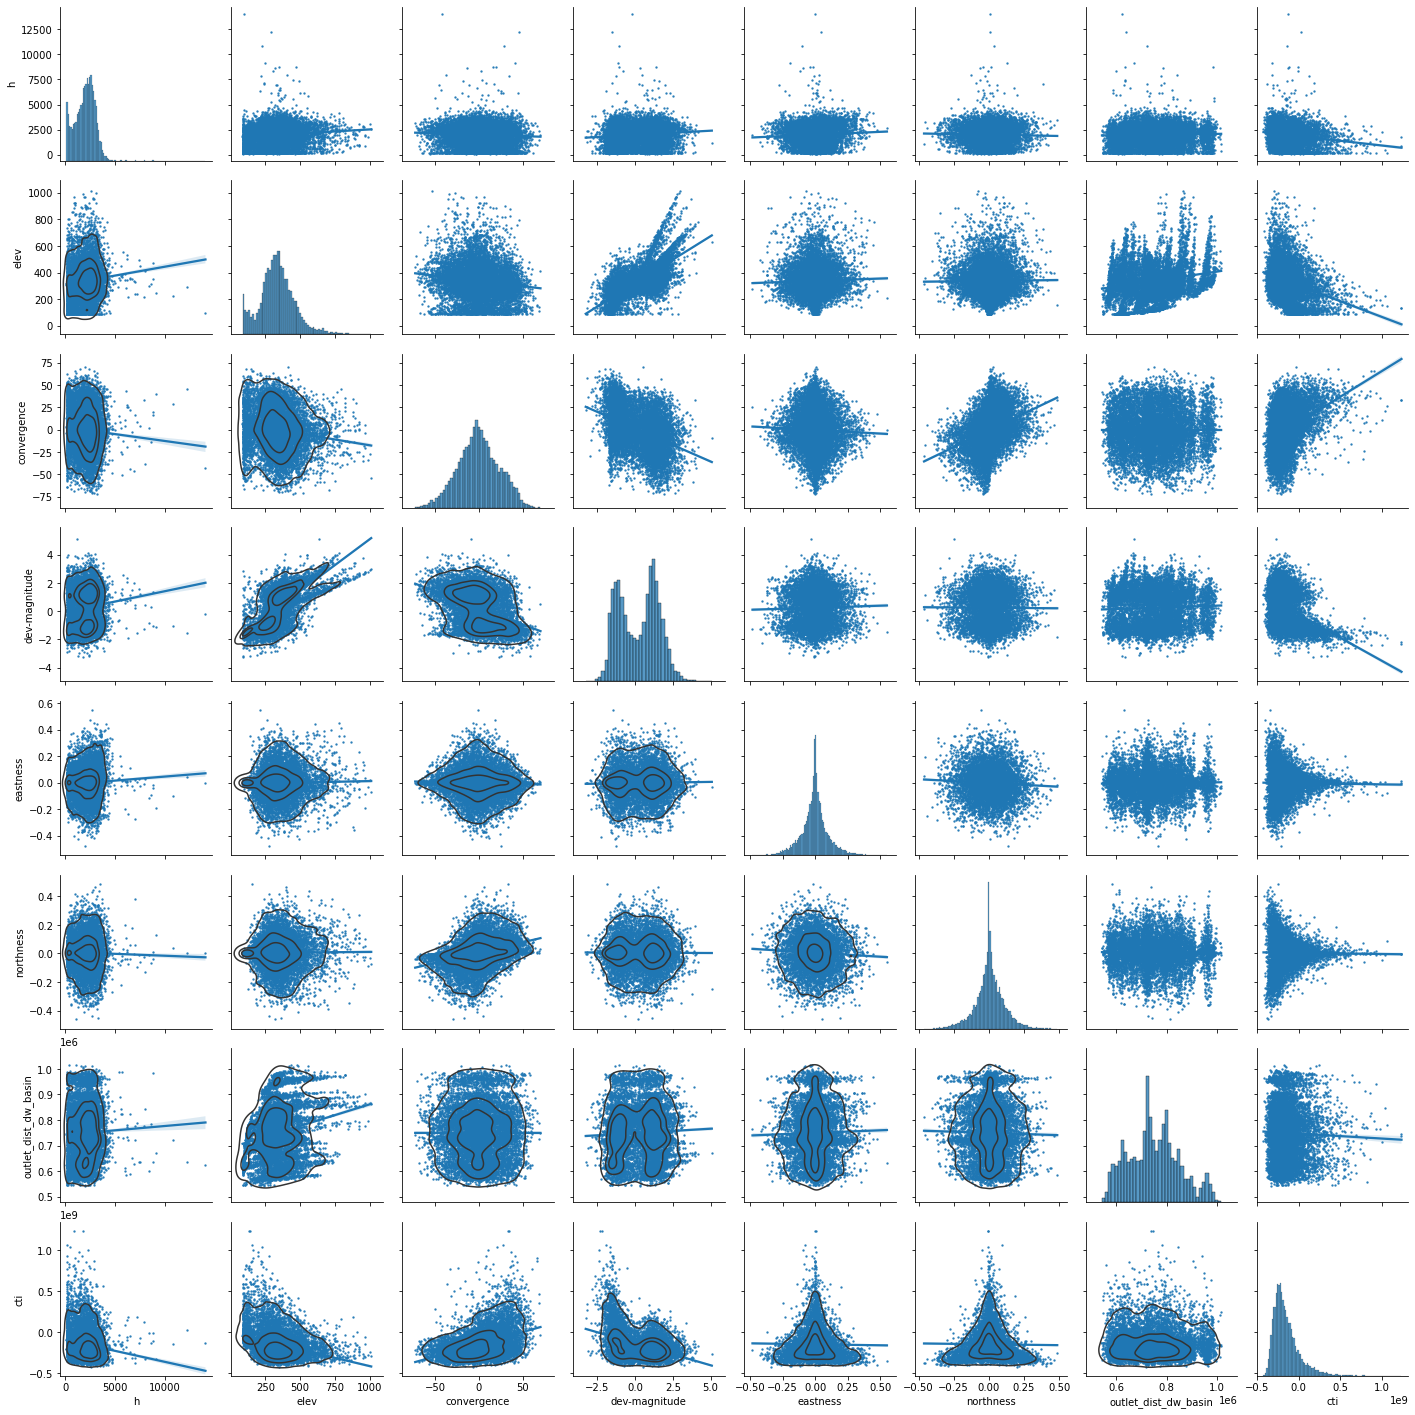

In [11]:
predictors_sample = predictors[["h","elev","convergence","dev-magnitude","eastness","northness","outlet_dist_dw_basin","cti"]].sample(10000)
g = sns.pairplot(predictors_sample , kind="reg", plot_kws=dict(scatter_kws=dict(s=2)) )  
g.map_lower(sns.kdeplot, levels=4, color=".2")

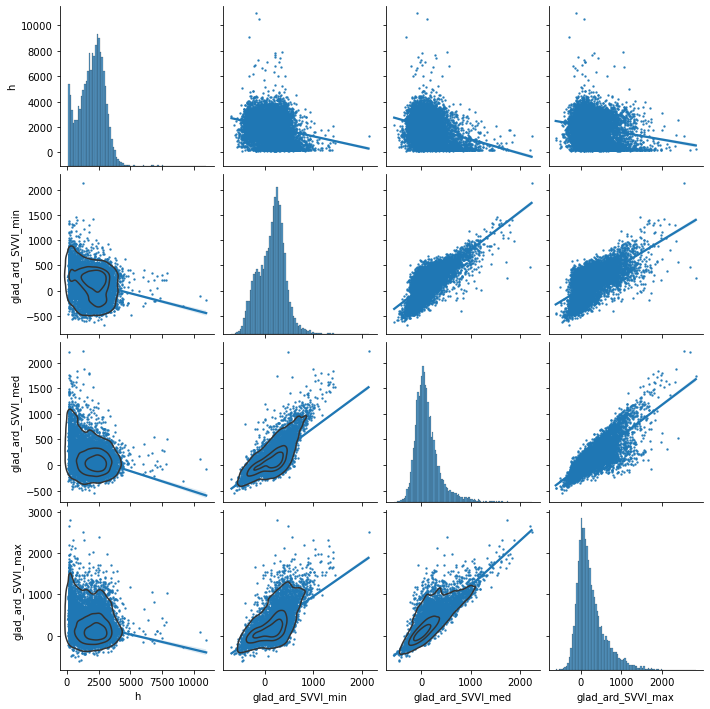

In [12]:
predictors_sample = predictors[["h","glad_ard_SVVI_min","glad_ard_SVVI_med","glad_ard_SVVI_max" ]].sample(10000)
g = sns.pairplot(predictors_sample , kind="reg", plot_kws=dict(scatter_kws=dict(s=2)) )  
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [13]:
### Assessing spatial autocorrelation

In [14]:
xy_val = pd.read_csv("tree_height/txt/eu_x_y_height_select.txt", sep=" ")
xy_val_sample = xy_val.sample(10000)
xy_val_sample.head()

ID       X        Y          h
1156667  1156668 9.49292 49.93394 1117.75000
1024856  1024857 9.14997 49.39489 1876.50000
708611    708612 8.16510 48.92672  219.50000
1008972  1008973 9.11153 49.49667 2431.75000
113330    113331 6.45285 48.26761 2423.50000

/home/user/.local/lib/python3.10/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


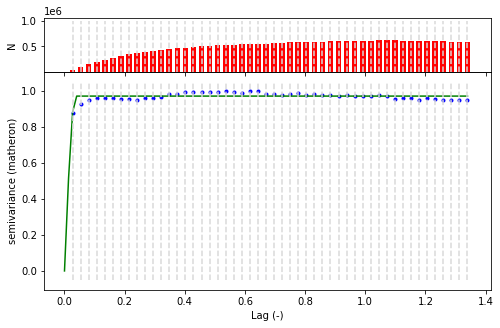

In [15]:
V = skg.Variogram(list(zip(xy_val_sample.X,xy_val_sample.Y)) , xy_val_sample.h ,  maxlag = 'median' ,  n_lags=50 )
fig = V.plot()